In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df=pd.read_csv('archive/test.csv')
df.head()

Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...

### Print the number of news for each class

In [3]:
print(df['Class Index'].value_counts())

3    1900
4    1900
2    1900
1    1900
Name: Class Index, dtype: int64


### Plot the number of news for each class

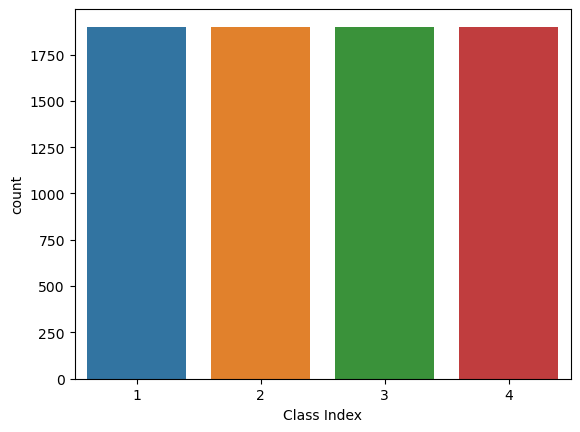

In [4]:
sns.countplot(x='Class Index', data=df)
plt.show()

### Drop the News of Category 3

In [5]:
df_1 = df[df['Class Index'] != 3]

### Character count of Each Description

In [6]:
df_1.loc[:, 'char_count'] = df_1['Description'].apply(len)

C:\Users\manav\AppData\Local\Temp\ipykernel_8056\4267750800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:, 'char_count'] = df_1['Description'].apply(len)


In [7]:
df_1

Class Index                                              Title  \
1               4  The Race is On: Second Private Team Sets Launc...   
2               4      Ky. Company Wins Grant to Study Peptides (AP)   
3               4      Prediction Unit Helps Forecast Wildfires (AP)   
4               4        Calif. Aims to Limit Farm-Related Smog (AP)   
5               4  Open Letter Against British Copyright Indoctri...   
...           ...                                                ...   
7593            2    Mortaza strikes to lead superb Bangladesh rally   
7594            1               Powell pushes diplomacy for N. Korea   
7595            1                                   Around the world   
7596            2                        Void is filled with Clement   
7597            2                             Martinez leaves bitter   

                                            Description  char_count  
1     SPACE.com - TORONTO, Canada -- A second\team o...         234  
2     AP - A company founded by a chemistry research...         214  
3     AP - It's barely dawn when Mike Fitzpatrick st...         272  
4     AP - Southern California's smog-fighting agenc...         179  
5     The British Department for Education and Skill...         780  
...                                                 ...         ...  
7593  Paceman Mashrafe Mortaza claimed two prize sca...         195  
7594  WASHINGTON -- Outgoing Secretary of State Coli...         302  
7595  Ukrainian presidential candidate Viktor Yushch...         183  
7596  With the supply of attractive pitching options...         345  
7597  Like Roger Clemens did almost exactly eight ye...         156  

[5700 rows x 4 columns]

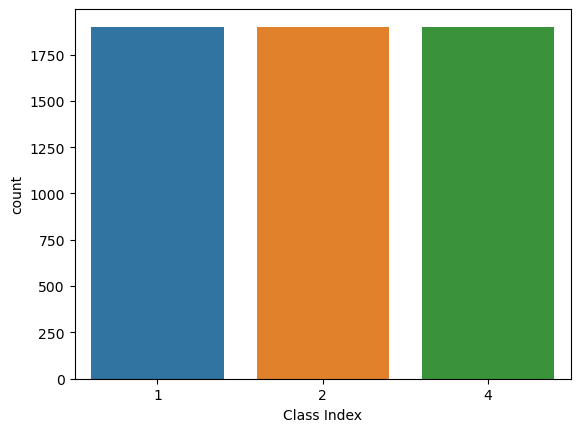

In [8]:
sns.countplot(x='Class Index', data=df_1)
plt.show()

### Selecting 100 Documents of Each Class

In [60]:

class_counts = df_1['Class Index'].value_counts()
df = pd.DataFrame()

for class_index in class_counts.index:
    class_df = df_1[df_1['Class Index'] == class_index]
    # class_df = class_df.sort_values(by='char_count')
    selected_df = class_df.head(100)
    df = pd.concat([df, selected_df], ignore_index=True)


In [61]:
df = df.drop(columns=['Title'])
df = df.drop(columns=['char_count'])
df['ID'] = range(1, len(df) + 1)
df['Description'] = df['Description'].str.strip()
df['Description'] = df['Description'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)
df['Description'] = df['Description'].str.lower()

In [62]:
df.head(100)

Class Index                                        Description   ID
0             4  spacecom  toronto canada  a secondteam of rock...    1
1             4  ap  a company founded by a chemistry researche...    2
2             4  ap  its barely dawn when mike fitzpatrick star...    3
3             4  ap  southern californias smogfighting agency w...    4
4             4  the british department for education and skill...    5
..          ...                                                ...  ...
95            4  ovie producers are often criticized for runnin...   96
96            4  internet retailer amazoncom inc said on thursd...   97
97            4  software developer salesforcecom inc posted a ...   98
98            4  like led zeppelin 39s  39 39stairway to heaven...   99
99            4  rising sea levels disappearing glaciers in the...  100

[100 rows x 3 columns]

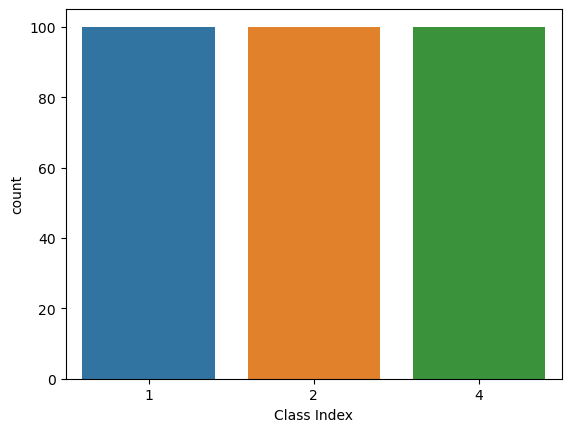

In [63]:
sns.countplot(x='Class Index', data=df)
plt.show()

In [64]:
df

Class Index                                        Description   ID
0              4  spacecom  toronto canada  a secondteam of rock...    1
1              4  ap  a company founded by a chemistry researche...    2
2              4  ap  its barely dawn when mike fitzpatrick star...    3
3              4  ap  southern californias smogfighting agency w...    4
4              4  the british department for education and skill...    5
..           ...                                                ...  ...
295            1  athens greece  the preliminaries in the 100 me...  296
296            1  labor members have scheduled two  39rebel 39 a...  297
297            1  a man and two women were shot dead by afghan a...  298
298            1  afghan president hamid karzai is to visit paki...  299
299            1  the plan would give the proposed national dire...  300

[300 rows x 3 columns]

### Function to make word shingles

In [65]:
def create_word_shingles(df, k=10):
    shingles = set()
    for index, row in df.iterrows():
        description = row['Description']
        description = description.split()
        for i in range(len(description) - k + 1):
            shingle = description[i:i+k]
            shingles.add(' '.join(description[i:i+k]))    
    return shingles



In [66]:
def shingles_per_row(text, k):
    shingle = set()
    text = text.split()
    for i in range(len(text) - k + 1):
        shingle.add(' '.join(text[i:i + k]))
    return set(shingle)

In [67]:
df['shingles5'] = df['Description'].apply(lambda x: shingles_per_row(x, 5))
df['shingles10'] = df['Description'].apply(lambda x: shingles_per_row(x, 10))
df['shingles8'] = df['Description'].apply(lambda x: shingles_per_row(x, 8))

In [68]:
df

Class Index                                        Description   ID  \
0              4  spacecom  toronto canada  a secondteam of rock...    1   
1              4  ap  a company founded by a chemistry researche...    2   
2              4  ap  its barely dawn when mike fitzpatrick star...    3   
3              4  ap  southern californias smogfighting agency w...    4   
4              4  the british department for education and skill...    5   
..           ...                                                ...  ...   
295            1  athens greece  the preliminaries in the 100 me...  296   
296            1  labor members have scheduled two  39rebel 39 a...  297   
297            1  a man and two women were shot dead by afghan a...  298   
298            1  afghan president hamid karzai is to visit paki...  299   
299            1  the plan would give the proposed national dire...  300   

                                             shingles5  \
0    {of rocketeers competing for the, toronto cana...   
1    {better peptides which are short, louisville w...   
2    {he expects winds will pick, day will bring li...   
3    {southern californias smogfighting agency went...   
4    {it useful and perhaps feel, a little so i wro...   
..                                                 ...   
295  {and defending champion maurice greene, saturd...   
296  {two 39rebel 39 antiperes conferences, be head...   
297  {usled troops after their vehicle, shot dead b...   
298  {fighting terror and boosting trade, karzai is...   
299  {intelligencegathering of the cia and, the cia...   

                                            shingles10  \
0    {suborbital space flight has officially announ...   
1    {a chemistry researcher at the university of l...   
2    {bring lightning will strike in places he expe...   
3    {went after emissions of the bovine variety fr...   
4    {of british musicians unfortunately they also ...   
..                                                 ...   
295  {show at the athens games five men broke 10 se...   
296  {to be headed by mk matan vilnai and the secon...   
297  {a man and two women were shot dead by afghan,...   
298  {karzai is to visit pakistan to discuss fighti...   
299  {would give the proposed national director res...   

                                             shingles8  
0    {3610 million ansari x prize a contest forpriv...  
1    {of louisville won a grant to develop a, a com...  
2    {strike in places he expects winds will pick, ...  
3    {rules to reduce air pollution from dairy cow,...  
4    {make this popular emi has apparently negotiat...  
..                                                 ...  
295  {preliminaries in the 100 meters were perhaps ...  
296  {two 39rebel 39 antiperes conferences for sund...  
297  {and usled troops after their vehicle ran thro...  
298  {afghan president hamid karzai is to visit pak...  
299  {proposed national director responsibility for...  

[300 rows x 6 columns]

In [69]:
def create_shingles_final(df):

    shingles_5 = create_word_shingles(df, 5)
    shingles_8 = create_word_shingles(df, 8)
    shingles_10 = create_word_shingles(df, 10)

    shingle_5_matrix = np.zeros((len(shingles_5), len(df)))
    shingle_8_matrix = np.zeros((len(shingles_8), len(df)))
    shingle_10_matrix = np.zeros((len(shingles_10), len(df)))

    for i, s in enumerate(shingles_5):
        for j in range(len(df)):
            if s in df['shingles5'][j]:
                shingle_5_matrix[i, j] = 1

    for i, s in enumerate(shingles_8):
        for j in range(len(df)):
            if s in df['shingles8'][j]:
                shingle_8_matrix[i, j] = 1

    for i, s in enumerate(shingles_10):
        for j in range(len(df)):
            if s in df['shingles10'][j]:
                shingle_10_matrix[i, j] = 1

    shingle_5_df = pd.DataFrame(shingle_5_matrix, index= list(shingles_5), columns=df.index)
    shingle_8_df = pd.DataFrame(shingle_8_matrix, index= list(shingles_8), columns=df.index)
    shingle_10_df = pd.DataFrame(shingle_10_matrix, index= list(shingles_10), columns=df.index)
    
    return shingle_5_df, shingle_8_df, shingle_10_df

In [70]:
word_shingle_5_df, word_shingle_8_df, word_shingle_10_df = create_shingles_final(df)

Printing Shingles Matrix for k=5

In [71]:
word_shingle_5_df

0    1    2    3    4    5    6    7    \
agreed on ceasefire as a             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
election office in afghanistan that  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
that scans a suspects fingerprint    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
to the mets with radical             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
in scandinavia as a result           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                  ...  ...  ...  ...  ...  ...  ...  ...   
targets in new york new              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
president bush in pennsylvania said  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
ap the man who claims                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
to become the first american         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
was reeling from the latest          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                     8    9    ...  290  291  292  293  294  \
agreed on ceasefire as a             0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
election office in afghanistan that  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
that scans a suspects fingerprint    0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
to the mets with radical             0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
in scandinavia as a result           0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
...                                  ...  ...  ...  ...  ...  ...  ...  ...   
targets in new york new              0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
president bush in pennsylvania said  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
ap the man who claims                0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
to become the first american         0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
was reeling from the latest          0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   

                                     295  296  297  298  299  
agreed on ceasefire as a             0.0  0.0  0.0  0.0  0.0  
election office in afghanistan that  0.0  0.0  0.0  0.0  0.0  
that scans a suspects fingerprint    0.0  0.0  0.0  0.0  0.0  
to the mets with radical             0.0  0.0  0.0  0.0  0.0  
in scandinavia as a result           0.0  0.0  0.0  0.0  0.0  
...                                  ...  ...  ...  ...  ...  
targets in new york new              0.0  0.0  0.0  0.0  0.0  
president bush in pennsylvania said  0.0  0.0  0.0  0.0  0.0  
ap the man who claims                0.0  0.0  0.0  0.0  0.0  
to become the first american         0.0  0.0  0.0  0.0  0.0  
was reeling from the latest          0.0  0.0  0.0  0.0  0.0  

[8607 rows x 300 columns]

Printing Shingles Matrix for k=8

In [73]:
word_shingle_8_df

0    1    2    3    4    \
shiite fighters appeared still to be in control     0.0  0.0  0.0  0.0  0.0   
over missed dope tests that has tarnished the       0.0  0.0  0.0  0.0  0.0   
water and other supplies to thousands of people     0.0  0.0  0.0  0.0  0.0   
share down from the earlier prediction of 108       0.0  0.0  0.0  0.0  0.0   
census metropolitan areas but still found it ha...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
wednesday took a lawsuit byecuadorean indians a...  0.0  0.0  0.0  0.0  0.0   
network us ryder cup captain hal sutton finalized   0.0  0.0  0.0  0.0  0.0   
would be populated from the social network as       0.0  0.0  0.0  0.0  0.0   
cluley senior technology consultant at sophos s...  0.0  0.0  0.0  0.0  0.0   
for a touchdown and running for another in          0.0  0.0  0.0  0.0  0.0   

                                                    5    6    7    8    9    \
shiite fighters appeared still to be in control     0.0  0.0  0.0  0.0  0.0   
over missed dope tests that has tarnished the       0.0  0.0  0.0  0.0  0.0   
water and other supplies to thousands of people     0.0  0.0  0.0  0.0  0.0   
share down from the earlier prediction of 108       0.0  0.0  0.0  0.0  0.0   
census metropolitan areas but still found it ha...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
wednesday took a lawsuit byecuadorean indians a...  0.0  0.0  0.0  0.0  0.0   
network us ryder cup captain hal sutton finalized   0.0  0.0  0.0  0.0  0.0   
would be populated from the social network as       0.0  1.0  0.0  0.0  0.0   
cluley senior technology consultant at sophos s...  1.0  0.0  0.0  0.0  0.0   
for a touchdown and running for another in          0.0  0.0  0.0  0.0  0.0   

                                                    ...  290  291  292  293  \
shiite fighters appeared still to be in control     ...  0.0  0.0  0.0  0.0   
over missed dope tests that has tarnished the       ...  0.0  0.0  0.0  0.0   
water and other supplies to thousands of people     ...  0.0  0.0  0.0  0.0   
share down from the earlier prediction of 108       ...  0.0  0.0  0.0  0.0   
census metropolitan areas but still found it ha...  ...  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
wednesday took a lawsuit byecuadorean indians a...  ...  0.0  0.0  0.0  0.0   
network us ryder cup captain hal sutton finalized   ...  0.0  0.0  0.0  0.0   
would be populated from the social network as       ...  0.0  0.0  0.0  0.0   
cluley senior technology consultant at sophos s...  ...  0.0  0.0  0.0  0.0   
for a touchdown and running for another in          ...  0.0  0.0  0.0  0.0   

                                                    294  295  296  297  298  \
shiite fighters appeared still to be in control     0.0  0.0  0.0  0.0  0.0   
over missed dope tests that has tarnished the       0.0  0.0  0.0  0.0  0.0   
water and other supplies to thousands of people     0.0  0.0  0.0  0.0  0.0   
share down from the earlier prediction of 108       0.0  0.0  0.0  0.0  0.0   
census metropolitan areas but still found it ha...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
wednesday took a lawsuit byecuadorean indians a...  0.0  0.0  0.0  0.0  0.0   
network us ryder cup captain hal sutton finalized   0.0  0.0  0.0  0.0  0.0   
would be populated from the social network as       0.0  0.0  0.0  0.0  0.0   
cluley senior technology consultant at sophos s...  0.0  0.0  0.0  0.0  0.0   
for a touchdown and running for another in          0.0  0.0  0.0  0.0  0.0   

                                                    299  
shiite fighters appeared still to be in control     0.0  
over missed dope tests that has tarnished the       0.0  
water and other supplies to thousands of people     0.0  
share down from the earl

Printing Shingles Matrix for k=10

In [74]:
word_shingle_10_df

0    1    2    3    4    \
in europe a 500m 70000 phone voip infrastructur...  0.0  0.0  0.0  0.0  0.0   
more on its server operating system and enterpr...  0.0  0.0  0.0  0.0  0.0   
it should have better anticipated hurricane cha...  0.0  0.0  0.0  0.0  0.0   
are short chains of amino acids the building bl...  0.0  1.0  0.0  0.0  0.0   
debut in the olympic games on wednesday as 18ye...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
its barely dawn when mike fitzpatrick starts hi...  0.0  0.0  1.0  0.0  0.0   
its former west bank leader marwan barghouti wo...  0.0  0.0  0.0  0.0  0.0   
local tv the bush and kerry ads air so frequently   0.0  0.0  0.0  0.0  0.0   
at iraqs national conference called on radical ...  0.0  0.0  0.0  0.0  0.0   
become the first american in 20 years to seize the  0.0  0.0  0.0  0.0  0.0   

                                                    5    6    7    8    9    \
in europe a 500m 70000 phone voip infrastructur...  0.0  0.0  0.0  0.0  0.0   
more on its server operating system and enterpr...  0.0  0.0  0.0  0.0  0.0   
it should have better anticipated hurricane cha...  0.0  0.0  0.0  0.0  0.0   
are short chains of amino acids the building bl...  0.0  0.0  0.0  0.0  0.0   
debut in the olympic games on wednesday as 18ye...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
its barely dawn when mike fitzpatrick starts hi...  0.0  0.0  0.0  0.0  0.0   
its former west bank leader marwan barghouti wo...  0.0  0.0  0.0  0.0  0.0   
local tv the bush and kerry ads air so frequently   0.0  0.0  0.0  0.0  0.0   
at iraqs national conference called on radical ...  0.0  0.0  0.0  0.0  0.0   
become the first american in 20 years to seize the  0.0  0.0  0.0  0.0  0.0   

                                                    ...  290  291  292  293  \
in europe a 500m 70000 phone voip infrastructur...  ...  0.0  0.0  0.0  0.0   
more on its server operating system and enterpr...  ...  0.0  0.0  0.0  0.0   
it should have better anticipated hurricane cha...  ...  0.0  0.0  0.0  0.0   
are short chains of amino acids the building bl...  ...  0.0  0.0  0.0  0.0   
debut in the olympic games on wednesday as 18ye...  ...  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
its barely dawn when mike fitzpatrick starts hi...  ...  0.0  0.0  0.0  0.0   
its former west bank leader marwan barghouti wo...  ...  0.0  0.0  0.0  0.0   
local tv the bush and kerry ads air so frequently   ...  0.0  0.0  0.0  0.0   
at iraqs national conference called on radical ...  ...  0.0  0.0  0.0  0.0   
become the first american in 20 years to seize the  ...  0.0  0.0  0.0  0.0   

                                                    294  295  296  297  298  \
in europe a 500m 70000 phone voip infrastructur...  0.0  0.0  0.0  0.0  0.0   
more on its server operating system and enterpr...  0.0  0.0  0.0  0.0  0.0   
it should have better anticipated hurricane cha...  0.0  0.0  0.0  0.0  0.0   
are short chains of amino acids the building bl...  0.0  0.0  0.0  0.0  0.0   
debut in the olympic games on wednesday as 18ye...  0.0  0.0  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
its barely dawn when mike fitzpatrick starts hi...  0.0  0.0  0.0  0.0  0.0   
its former west bank leader marwan barghouti wo...  0.0  0.0  0.0  0.0  0.0   
local tv the bush and kerry ads air so frequently   0.0  0.0  0.0  0.0  0.0   
at iraqs national conference called on radical ...  0.0  0.0  0.0  0.0  0.0   
become the first american in 20 years to seize the  0.0  0.0  0.0  0.0  0.0   

                                                    299  
in europe a 500m 70000 phone voip infrastructur...  0.0  
more on its server operating system and enterpr...  0.0  
it should have better anticipated hurricane cha...  0.0  
are short chains of amin

### Performing Min Hashing

Min Hashing is performed using example 3.8 of Mining of Massive Datasets

In [75]:
def min_hashing(shingle_df, percentage):
    num_hash_functions = int(shingle_df.shape[0] * percentage)
    hash_functions = [(np.random.randint(1, 100), np.random.randint(1, 100)) for _ in range(num_hash_functions)]

    signature_matrix = pd.DataFrame(np.inf, index=range(1, num_hash_functions + 1), columns=shingle_df.columns.difference(['Shingle']))

    shingle_index_map = {shingle: idx for idx, shingle in enumerate(shingle_df.index)}

    for index, row in shingle_df.iterrows():
        for col in shingle_df.columns:
            if row[col] == 1:
                for i, (a, b) in enumerate(hash_functions, start=1):
                    hash_value = (a * shingle_index_map[index] + b) % shingle_df.shape[0]
                    signature_matrix.loc[i, col] = min(signature_matrix.loc[i, col], hash_value)

    return signature_matrix

In [76]:
def min_hashing_final(shingle_df, percentage):    
    signature_matrix = min_hashing(shingle_df, percentage)
    return signature_matrix

In [77]:
def compute_signatures_matrices(shingle_5_df, shingle_8_df, shingle_10_df, percentage):

    signature_matrix_5 = min_hashing(shingle_5_df, percentage)
    signature_matrix_8 = min_hashing(shingle_8_df, percentage)
    signature_matrix_10 = min_hashing(shingle_10_df, percentage)
    
    return signature_matrix_5, signature_matrix_8, signature_matrix_10

### Store the Signature Matrix in a CSV File

Taking Retention Percentage=10%

In [78]:
signature_matrix_5_10, signature_matrix_8_10, signature_matrix_10_10 = compute_signatures_matrices(word_shingle_5_df, word_shingle_8_df, word_shingle_10_df, 0.1)

signature_matrix_5_10.to_csv('word_signature_matrix_5_10.csv')
signature_matrix_8_10.to_csv('word_signature_matrix_8_10.csv')
signature_matrix_10_10.to_csv('word_signature_matrix_10_10.csv')

### Store the Signature Matrix in a CSV File

Taking Retention Percentage=20%

In [79]:
signature_matrix_5_20, signature_matrix_8_20, signature_matrix_10_20 = compute_signatures_matrices(word_shingle_5_df, word_shingle_8_df, word_shingle_10_df, 0.2)


signature_matrix_5_20.to_csv('word_signature_matrix_5_20.csv')
signature_matrix_8_20.to_csv('word_signature_matrix_8_20.csv')
signature_matrix_10_20.to_csv('word_signature_matrix_10_20.csv')

### Store the Signature Matrix in a CSV File

Taking Retention Percentage=30%

In [80]:
signature_matrix_5_30, signature_matrix_8_30, signature_matrix_10_30 = compute_signatures_matrices(word_shingle_5_df, word_shingle_8_df, word_shingle_10_df, 0.3)

# store the signature matrix in a csv file
signature_matrix_5_30.to_csv('word_signature_matrix_5_30.csv')
signature_matrix_8_30.to_csv('word_signature_matrix_8_30.csv')
signature_matrix_10_30.to_csv('word_signature_matrix_10_30.csv')

### Store the Signature Matrix in a CSV File

Taking Retention Percentage=50%

In [81]:
signature_matrix_5_50, signature_matrix_8_50, signature_matrix_10_50 = compute_signatures_matrices(word_shingle_5_df, word_shingle_8_df, word_shingle_10_df, 0.5)


signature_matrix_5_50.to_csv('word_signature_matrix_5_50.csv')
signature_matrix_8_50.to_csv('word_signature_matrix_8_50.csv')
signature_matrix_10_50.to_csv('word_signature_matrix_10_50.csv')

#### Take the signature matrix from the csv file

In [89]:
signature_matrix_5_10=pd.read_csv('signature_matrix_5_10.csv', index_col=0)
signature_matrix_8_10=pd.read_csv('signature_matrix_8_10.csv', index_col=0)
signature_matrix_10_10=pd.read_csv('signature_matrix_10_10.csv', index_col=0)

signature_matrix_5_20=pd.read_csv('signature_matrix_5_20.csv', index_col=0)
signature_matrix_8_20=pd.read_csv('signature_matrix_8_20.csv', index_col=0)
signature_matrix_10_20=pd.read_csv('signature_matrix_10_20.csv', index_col=0)

signature_matrix_5_30=pd.read_csv('signature_matrix_5_30.csv', index_col=0)
signature_matrix_8_30=pd.read_csv('signature_matrix_8_30.csv', index_col=0)
signature_matrix_10_30=pd.read_csv('signature_matrix_10_30.csv', index_col=0)



Printing Signature matrix for k=8 and retention percentage=10%

In [82]:
signature_matrix_8_10

0      1       2      3      4      5      6       7       8      9    \
1    209.0  294.0   381.0  912.0  114.0   47.0   29.0  1953.0   564.0  184.0   
2    820.0  446.0   296.0  385.0   23.0  106.0    6.0  4405.0    59.0   22.0   
3     43.0  270.0   107.0  412.0  237.0   68.0  168.0    92.0   540.0  387.0   
4    388.0   72.0   793.0  519.0   76.0   66.0   73.0  3403.0   128.0  104.0   
5    380.0  290.0    42.0  438.0   33.0   31.0    3.0  1516.0   452.0  230.0   
..     ...    ...     ...    ...    ...    ...    ...     ...     ...    ...   
769  487.0  342.0  1406.0   83.0    7.0   29.0  163.0   695.0   796.0  289.0   
770    2.0  326.0   234.0  164.0   21.0    1.0  322.0  1599.0  2108.0    6.0   
771  419.0  249.0    76.0  123.0   47.0   54.0   94.0   325.0   309.0  469.0   
772  699.0   67.0   148.0  114.0   75.0   28.0   69.0   450.0   179.0  131.0   
773  297.0  150.0   618.0  144.0  186.0   21.0   15.0  1548.0   171.0  504.0   

     ...     290     291     292    293    294    295     296     297     298  \
1    ...   366.0   140.0   195.0   85.0  895.0  289.0   694.0   140.0   166.0   
2    ...   341.0   358.0    46.0  229.0  249.0  355.0    37.0   358.0  3153.0   
3    ...   534.0    59.0   240.0  121.0  335.0   75.0   595.0    59.0   445.0   
4    ...    17.0   331.0  1705.0   20.0  148.0   47.0   177.0   331.0   380.0   
5    ...     0.0  1134.0   561.0  183.0  512.0  226.0  1082.0  1242.0   595.0   
..   ...     ...     ...     ...    ...    ...    ...     ...     ...     ...   
769  ...   190.0   279.0   529.0   22.0  648.0  130.0   482.0   279.0   645.0   
770  ...    47.0    12.0   382.0  225.0  243.0  196.0    88.0    12.0  1054.0   
771  ...   455.0  1706.0   155.0  529.0  133.0   50.0   468.0  1706.0   165.0   
772  ...  1134.0   585.0   326.0   84.0  219.0   17.0   277.0   585.0   683.0   
773  ...   480.0   111.0   213.0   30.0  567.0  141.0    18.0   111.0   285.0   

        299  
1     822.0  
2     354.0  
3     120.0  
4       1.0  
5     597.0  
..      ...  
769   729.0  
770  1096.0  
771   119.0  
772    62.0  
773   672.0  

[773 rows x 300 columns]

### Finding the Jaccard Similarity using Shingles-Document Matrix


In [83]:
def jaccard_similarity_column(shingle_df, i, j):
    
    intersection = np.sum((shingle_df[:, i] == shingle_df[:, j]) & (shingle_df[:, i] == 1))
    union = np.sum((shingle_df[:, i] == 1) | (shingle_df[:, j] == 1))

    if union == 0:
        return 0.0  # Avoid division by zero

    return intersection / union

In [90]:
similarity_list_k_5=[]
for i in range(1, 300):
    for j in range(i + 1, 300):
        similarity_list_k_5.append(jaccard_similarity_column(word_shingle_5_df.values, i, j))

        print(f"Jaccard similarity between document {i} and {j} is {jaccard_similarity_column(word_shingle_5_df.values, i, j)}")



Jaccard similarity between document 1 and 2 is 0.0
Jaccard similarity between document 1 and 3 is 0.0
Jaccard similarity between document 1 and 4 is 0.0
Jaccard similarity between document 1 and 5 is 0.0
Jaccard similarity between document 1 and 6 is 0.0
Jaccard similarity between document 1 and 7 is 0.0
Jaccard similarity between document 1 and 8 is 0.0
Jaccard similarity between document 1 and 9 is 0.0
Jaccard similarity between document 1 and 10 is 0.0
Jaccard similarity between document 1 and 11 is 0.0
Jaccard similarity between document 1 and 12 is 0.0
Jaccard similarity between document 1 and 13 is 0.0
Jaccard similarity between document 1 and 14 is 0.0
Jaccard similarity between document 1 and 15 is 0.0
Jaccard similarity between document 1 and 16 is 0.0
Jaccard similarity between document 1 and 17 is 0.0
Jaccard similarity between document 1 and 18 is 0.0
Jaccard similarity between document 1 and 19 is 0.0
Jaccard similarity between document 1 and 20 is 0.0
Jaccard similarity b

In [91]:
print("Similarity List for k=5:")
print(similarity_list_k_5)   



Similarity List for k=5:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Plot the similarity list 

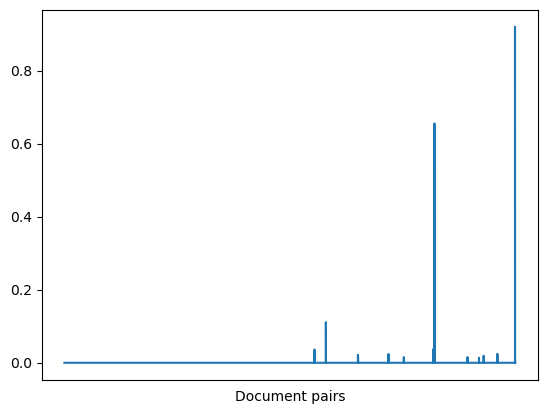

In [92]:
plt.plot(similarity_list_k_5)
plt.xticks([])
plt.xlabel('Document pairs')
plt.show()

### Finding Jaccard Similarity using Signature Matrix

In [93]:
def jaccard_similarity_signature(signature_matrix, i, j):
    return np.sum(signature_matrix.loc[:, i] == signature_matrix.loc[:, j]) / np.sum(signature_matrix.loc[:, i])

In [94]:
def calculate_jaccard_similarity_for_matrix(signature_matrix):
    num_columns = signature_matrix.shape[1]
    similarity_list = []

    for i in range(num_columns - 1):
        for j in range(i + 1, num_columns):
            similarity = jaccard_similarity_signature(signature_matrix, signature_matrix.columns[i], signature_matrix.columns[j])
            similarity_list.append(similarity)
            print(f"Jaccard similarity between document {signature_matrix.columns[i]} and {signature_matrix.columns[j]} is {similarity}")

    return similarity_list

The similarity list for the signature matrix with 10% of the shingles

In [98]:
similarity_list_5_10 = calculate_jaccard_similarity_for_matrix(signature_matrix_5_10)

Jaccard similarity between document 0 and 1 is 0.0
Jaccard similarity between document 0 and 2 is 8.186458634306078e-05
Jaccard similarity between document 0 and 3 is 0.0
Jaccard similarity between document 0 and 4 is 0.0
Jaccard similarity between document 0 and 5 is 0.0008876689460335806
Jaccard similarity between document 0 and 6 is 0.0008876689460335806
Jaccard similarity between document 0 and 7 is 0.0008973000738386465
Jaccard similarity between document 0 and 8 is 0.0008876689460335806
Jaccard similarity between document 0 and 9 is 0.0008876689460335806
Jaccard similarity between document 0 and 10 is 0.0008876689460335806
Jaccard similarity between document 0 and 11 is 0.0008876689460335806
Jaccard similarity between document 0 and 12 is 0.0007817265401778549
Jaccard similarity between document 0 and 13 is 0.0008234614273331407
Jaccard similarity between document 0 and 14 is 0.0007817265401778549
Jaccard similarity between document 0 and 15 is 0.0007817265401778549
Jaccard simil

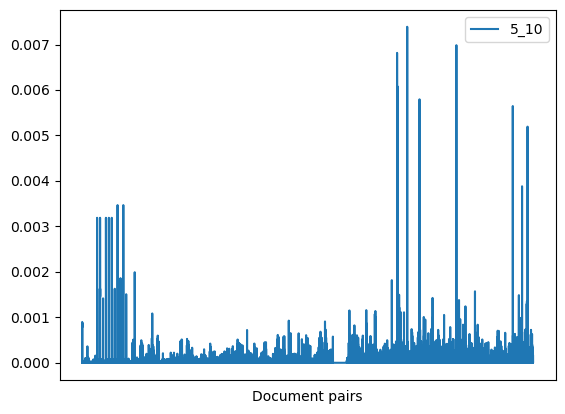

In [99]:
plt.plot(similarity_list_5_10, label='5_10')
plt.xticks([])
plt.legend()
plt.xlabel('Document pairs')
plt.show()


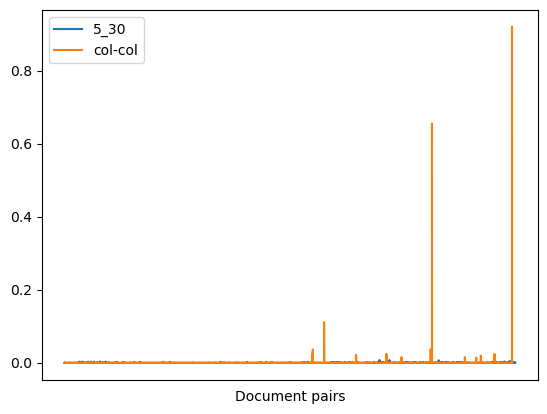

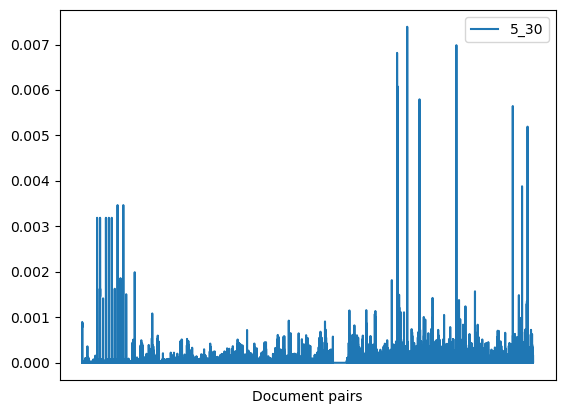

In [101]:
plt.plot(similarity_list_5_10, label='5_30')
plt.plot(similarity_list_k_5, label='col-col')
plt.xticks([])
plt.legend()
plt.xlabel('Document pairs')
plt.show()

plt.plot(similarity_list_5_10, label='5_30')
plt.xticks([])
plt.legend()
plt.xlabel('Document pairs')
plt.show()